# TEMA 3: Clasificación

Los problemas de **aprendizaje automatico** pueden dividirse en dos grupos:
1. **Clasificacion**: Cuando la variable dependiente es de tipo discreto
2. **Regresion**: Cuando la variable dependiente es de tipo continuo

Para este problema vamos a utilizar un dataset de la biblioteca scikit-learn que es ***MNIST*** que consiste en 70.000 imagenes de tamaño 28 x 28 pixels donde cada imagen representa un digito del 0 al 9 escrito a mano por estudiantes

## Importaciones

In [3]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["image.cmap"] = 'gray'

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


## Importación del dataset

In [4]:
mnist = fetch_openml('mnist_784',version=1)

Los datasets de la biblioteca scikit-learn estan en un formato que se llama **bunch**, que es parecido a un diccionario pero con informacion extra. Vamos a ver las claves que contiene un bunch

In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Los principales campos son:
1.  **data**: Contiene un narray (de numpy) con los ejemplos en las filas (en este caso 70000) y los atributos (features) en las columnas (en este caso 28 x 28 = 784 columnas)
2. **target**: Contiene un vector unidimensional con la variable dependiente (etiquetas o labels) (en este caso 70000 filas)
3. **feature_names**: Contiene los nombres de los atributos. En este caso tiene poca importancia porque cada atributo es un pixel
4. **DESCR**: Contiene una descripcion del dataset

Dentro de los problemas de clasificacion podemos diferenciar dos tipos:
1. **Clasificacion binaria**: La variable dependiente (target) toma solo dos valores (0 - 1)
2. **Clasificacion multiclase**: La variable dependiente (target) toma mas de dos valores

En realidad el problema que abordamos es un problema de clasificacion multiclase puesto que la variable dependiente toma 10 valores diferentes (de 0 a 9). Pero en el primer supuesto lo vamos a transformar en un problema de clasificacion binaria suponiendo que queremos crear un clasificador que clasifique si un digito es el numero "5" o no lo es.

## Creación de los grupos de entrenamiento y test

Como los ejemplos se encuentran ya mezclados de forma aleatoria (shuffle), elegimos los 60000 primeros para el grupo de entrenamiento (train) y los 10000 restantes para el grupo de test (test)

In [6]:
X_train = mnist.data[:60000]
y_train = mnist.target[:60000]
X_test = mnist.data[-10000:]
y_test = mnist.target[-10000:]

Mostramos la primera imagen del grupo de entrenamiento

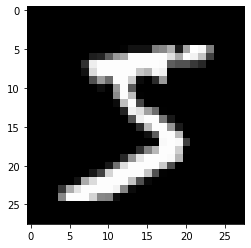

In [7]:
plt.imshow(X_train[0].reshape(28,28))

y la correspondiente etiqueta

In [8]:
y_train[0]

'5'

Como vemos los valores de la etiqueta son de tipo *string* y debemos transformarlos a formato numerico

In [9]:
y_train = y_train.astype(np.uint8)

In [10]:
y_train[0]

5

Ahora es formato numerico (enteros sin signo de 8 bytes). Hacemos lo mismo con el grupo de test

In [11]:
y_test = y_test.astype(np.uint8)

Ahora vamos a transformar los conjuntos de etiquetas (y_train, y_test) en binarios (dado que en el conjunto original toman valores de 0 a 9). Daremos el valor 1 (True) al 5 y 0 (False) a los valores que no son 5

In [12]:
y_train = (y_train == 5)

In [13]:
y_test = (y_test == 5)

## 2. Creación del clasificador
El clasificador que vamos a utilizar es un clasificador lineal SGD (Stochastic Gradient Descent). Este clasificador lo que hace es utilizar un tipo especial de algoritmo de Gradiente Decreciente que utiliza para la actualizacion de los parametros un gradiente calculado solo sobre una muestra y no sobre las medias de todas las muestras del conjunto (60000). Por esta razon es un algoritmo mas eficiente cuando se trata de conjuntos grandes. Tiene el inconveniente de que a diferencia del algoritmo de Gradiente Decreciente clasico, no se puede asegurar que se alcance un minimo global para la funcion de coste, aunque normalmente los valores de los parametros que se consiguen con este algoritmo son suficientemente buenos y se aproximan bastante a un minimo global

In [14]:
from sklearn.linear_model import SGDClassifier

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [15]:
classifier = SGDClassifier()

Realizamos el entrenamiento en el conjunto de entrenamiento

In [16]:
classifier.fit(X_train,y_train)

SGDClassifier()

y la prediccion en el conjunto de test

In [17]:
predictions = classifier.predict(X_test)

## 3. Medida del rendimiento del modelo
Dado que se trata de un problema de clasificacion el rendimiento del modelo lo podemos hacer de dos formas:
1. **Hands-on**: Probandolo y midiendo su rendimiento en el conjunto de test (X_test, y_test)
2. **Cross-validation**: En este caso lo que hacemos es probarlo sobre todo el conjunto de entrenamiento (X_train, y_train). Lo que hacemos es dividir el conjunto de entrenamiento en varias partes iguales llamada **folders** (tipicamiente entre 3 y 10) y realizar tantas pasadas del algoritmo como folders hay, utilizando en cada pasada un folder como conjunto de test y el resto como conjunto de entrenamiento. De esta manera se obtienen tantos resultados ("accuracy") como folders hemos dividido. El resultado final sera la media del rendimiento de todas las pasadas.
En cuanto a las medidas que podemos utilizar, la base es la **matriz de confusion** y a partir de ella se pueden calcular las diferentes medidas como exactitud (accuracy), precision(precission) o sensibilidad (recall)

### 3.1. Rendimiento calculado utilizando el conjunto de test ("Hands-on")

#### Matriz de confusion (confusion matrix)

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
matriz_confusion = confusion_matrix(y_test,predictions)
matriz_confusion

array([[8333,  775],
       [  68,  824]])

**Interpretacion de la matriz de confusion:** Las filas de la matriz representan los valores reales (las etiquetas del modelo o y_test), mientras que las columnas representan las prediciones realizadas por el modelo

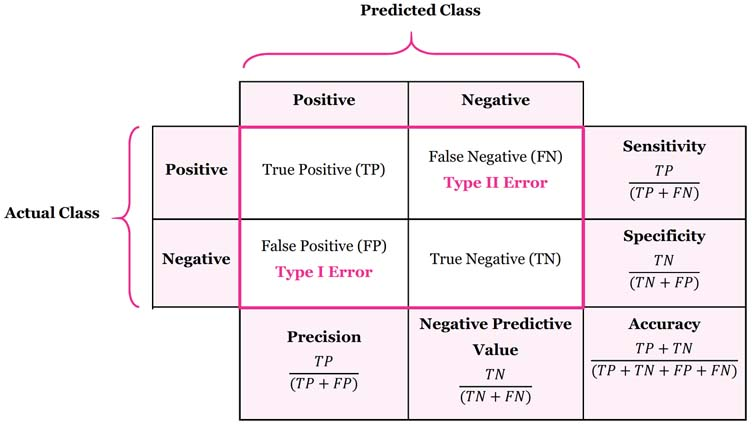

Sobre esta matriz vamos a calcular las diferentes medidas de rendimiento del modelo:
 



**Exactitud (accuracy):**

$$accuracy_{-}score = \frac{True Negative + True Positive}{Total}$$

**Precision (precision):**: Mide lo fiable que es el modelo cuando da positivo (tambien se llama *Valor Predictivo Positivo*)

$$precision_{-}score = \frac{True Positive}{True Positive + False Positive}$$

**Recall (Sensibilidad)**: Es la capacidad del modelo para captar positivos (no importa que tambien capte muchos falsos positivos (reales negativos clasificados como positivos).  El caso es que no se le escape ningun positivo. 

$$recall_{-}score = \frac{True Positive}{True Positive + False Negative}$$

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [21]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.9157

Como vemos la exactitud es muy alta, pero en este caso no es una medida muy valida porque la coleccion de ejemplos esta muy sesgada (los '5' representan solo el 10% de los ejemplos, entonces debemos valorar el rendimiento mediante la precision y la sensibilidad y una medida conjunta de las dos que es el F-score

In [22]:
precision = precision_score(y_test,predictions)
precision

0.515322076297686

In [23]:
sensibilidad = recall_score (y_test,predictions)
sensibilidad

0.9237668161434978

In [24]:
from sklearn.metrics import f1_score

In [25]:
f1 = f1_score(y_test,predictions)
f1

0.6615816940987554

f1 toma valores entre 0 y 1 por lo que esta bien

### 3.2. Rendimiento calculado utilizando Cross-Validation

Consiste en dividir el conjunto de entrenamiento en varias partes que se denominan **folders** (tipicamente entre 3 y 10). Se realiza el entrenamiento utilizando como conjunto de test uno de los folders y como conjunto de entrenamiento el resto. Por tanto se realizaran tantos entrenamiento como numero de folders. El resultado final es la media

In [26]:
from sklearn.model_selection import cross_val_score

In [28]:
cross_val_score(classifier,X_train,y_train,cv=5,scoring="accuracy").mean()

0.9633333333333333

Como vemos el modelo tiene una exactitud muy alta pero esto es engañoso dado que la frecuencia de la clase '5' es muy baja y por tanto el modelo esta muy sesgado. En estos casos la exactitud (accuracy) no es una buena medidad del rendimiento del modelo. Vamos a ver un ejemplo construyendo un transformer a medida

#### Construccion de un transformer a medida

Todos los objetos de sklearn implementan una interfaz que esta constituida por 3 grupos:
1.  **Estimators**: Esta constituida por todos los objetos cuya funcion es estimar los parametros a traves de un conjunto de entrenamiento. Implementan por tanto el metodo **fit()** que tipicamente recibe por parametros el conjunto de entrenamiento (X_train) junto con las etiquetas en el caso de que se trate de aprendizaje supervisado (y_train)
2.  **Transformers**: Realizan una transformacion de los datos de entrada a traves de los parametros obtenidos mediante el metodo fit(). A veces se combinan los dos metodos en fit_tranform()
3.  **Predictors**: Realiza predicciones en un dataset nuevo a traves de los parametros obtenidos. En ocasiones tiene un metodo **score()** que mide la calidad de las prediciones

Teniendo en cuenta estos preceptos basicos, podemos crear objetos transformers a medida, herendando de las clases de scikit-learn. Estos objetos deben implementar la interfaz basica de scikit-learn (fit(),transform(),predict())

Para ver que pasa cuando utilizamos el metodo "accuracy" para evaluar el rendimiento de un clasificador en el que los datos estan muy sesgados, vamos a construir un "clasificador a medida" que clasifique todos los ejemplos como "no 5"

In [31]:
from sklearn.base import BaseEstimator

In [33]:
class Never5Classifier (BaseEstimator):
    def fit (self, X, y = None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

**Comentarios:** BaseEstimator es la clase madre de todos los objetos estimadores. El metodo __init()__ no aparece porque lo hereda de la clase madre BaseEstimator. La clase BaseEstimator implementa dos metodos: get_params y set_params que actuan sobre los parametros que se pasan en el constructor y que son los hiperparametros del modelo

In [47]:
never5classifier = Never5Classifier()

In [48]:
never5classifier.get_params()

{}

En este caso el estimador no tiene hiperparametros

In [52]:
cross_val_score(never5classifier,X_train,y_train,cv = 5,scoring='accuracy').mean()

0.9096499999999998

Es decir este modelo que clasifica todos los ejemplos como 'no 5's' tiene una exactitud del 90%. Esto por supuesto no sirve para la valoracion

In [56]:
cross_val_score(never5classifier,X_train,y_train,cv = 5,scoring='recall').mean()

0.0

Sin embargo la sensibilidad es 0

In [57]:
cross_val_score(never5classifier,X_train,y_train,cv = 5,scoring='precision').mean()

0.0

y la precision tambien es 0

Esto podemos verlo tambien a traves de la matriz de confusion

In [59]:
from sklearn.model_selection import cross_val_predict

In [60]:
predictions = cross_val_predict(never5classifier,X_train,y_train,cv=5)

In [63]:
confusion_matrix(y_train,predictions)

array([[54579,     0],
       [ 5421,     0]])

#### Equilibrio entre precision/recall
La precision y la sensibilidad (recall) no tienen valores fijos y van a depender del threshold que elijamos para decidir si un ejemplo es positivo o negativo. Scikit-learn no nos permite determinar el limite que queremos utilizar para las decisiones, pero si nos permite ver los valores que se le asignan a cada ejemplo en la predicion mediante la funcion **decision_function()**

In [64]:
y_score_prediction = classifier.decision_function(X_train)

In [65]:
y_score_prediction

array([  5165.13026591,  -7980.49831456, -17419.55459092, ...,
         4515.83360409,  -2373.19582941,  -9783.85091689])

A partir de aqui podemos calcular el threshold que ha utilizado

In [71]:
pred_cero = y_score_prediction[predictions[:,0] == 0]

In [72]:
predictions.shape

(60000, 1)

In [73]:
y_score_prediction.shape

(60000,)

In [74]:
pred_cero.shape

(60000,)

In [75]:
pred_cero

array([  5165.13026591,  -7980.49831456, -17419.55459092, ...,
         4515.83360409,  -2373.19582941,  -9783.85091689])

In [76]:
max(pred_cero)

27586.34920274626